# Essais régression avec données simples générées

#__Réseau simple avec une seule couche cachée et une fonction d'activation *Relu*.__


In [1]:
# Génère les données
import numpy as np
from random import random
from sklearn.model_selection import train_test_split

import numpy.random as npr
x= npr.uniform(-1,1,300)
y=x*x 

X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.2)


In [3]:
# Build the model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mean_squared_error
from keras.utils.vis_utils import plot_model

inp = Input((1,))
h = Dense(10)(inp)
h1 = Activation ("relu")(h)
out = Dense(1)(h1)
model = Model(inputs=inp, outputs=out)
model.compile(Adam(),mean_squared_error)
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_2 (Dense)             (None, 10)                20        
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None


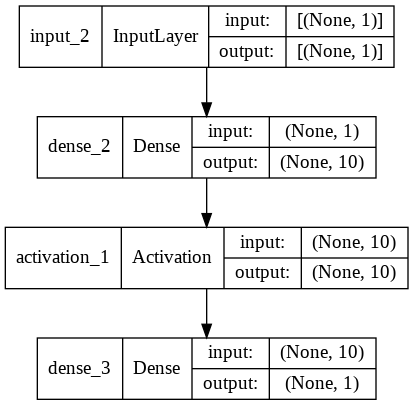

In [4]:
plot_model(model,show_shapes=True)

In [ ]:
H = model.fit(X_train,y_train,epochs=100,batch_size=30,validation_split=0.2)

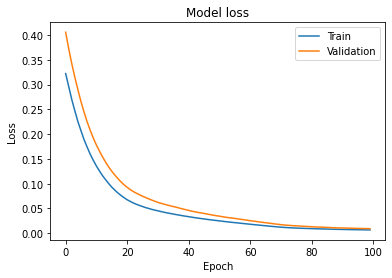

2/2 [==============================] - 0s 7ms/step - loss: 0.0068
Le loss sur le jeu de test est : 0.006809168960899115


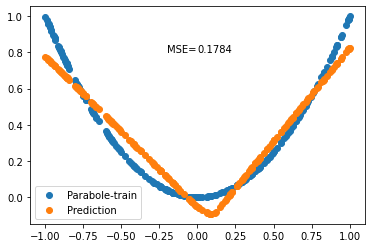

Text(0, 0.8, '0.1476')

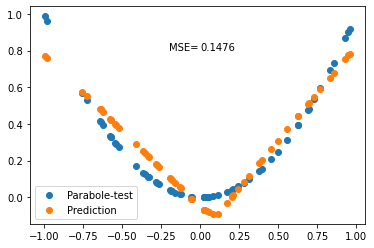

In [8]:
# Show results
import matplotlib.pyplot as plt

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

test_loss = model.evaluate(X_test,y_test)
print('Le loss sur le jeu de test est :' ,test_loss)

# observed vs predicted for training
pred_train=model.predict(X_train)
plt.scatter(X_train,y_train)
plt.scatter(X_train,pred_train)
plt.legend(['Parabole-train', 'Prediction'])
plt.text(-0.2,0.8,'MSE=')
plt.text(0,0.8,np.round(np.mean((pred_train-y_train)**2),4))
plt.show()

# observed vs predicted for test
pred=model.predict(X_test)
plt.scatter(X_test,y_test)
plt.scatter(X_test,pred)
plt.legend(['Parabole-test', 'Prediction'])
plt.text(-0.2,0.8,'MSE=')
plt.text(0,0.8,np.round(np.mean((pred-y_test)**2),4))

# Réseau avec plusieurs couches cachées

In [ ]:
inp = Input((1,))
h = Dense(6)(inp)
h1 = Activation ("relu")(h)
h2 = Dense(4) (h1)
h3 = Activation ("sigmoid")(h2)
h4 = Dense(4) (h3)
h5 = Activation ("relu")(h4)
out = Dense(1)(h5)

model = Model(inputs=inp, outputs=out)
model.compile(Adam(),mean_squared_error)

H = model.fit(X_train,y_train,epochs=150,batch_size=30,validation_split=0.2)


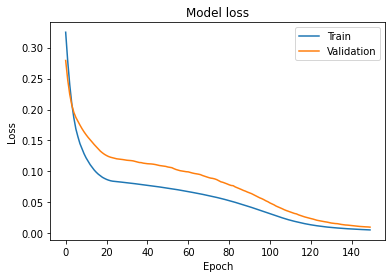

2/2 [==============================] - 0s 8ms/step - loss: 0.0051
Le loss sur le jeu de test est : 0.005053646396845579


Text(0, 0.8, '0.1455')

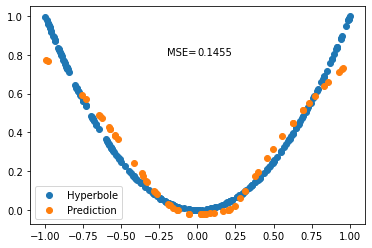

In [10]:
# Show results
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

test_loss = model.evaluate(X_test,y_test)
print('Le loss sur le jeu de test est :' ,test_loss)

pred=model.predict(X_test)

plt.scatter(X_train,y_train)
plt.scatter(X_test,pred)
plt.legend(['Hyperbole', 'Prediction'])
plt.text(-0.2,0.8,'MSE=')
plt.text(0,0.8,np.round(np.mean((pred-y_test)**2),4))

#__TODO__
* Augmenter la taille de l'échantillon
* Ajouter du bruit à la fonction y=x^2 avec par exmple npr.normal
* Que donne la prévision pour des valeurs tests en dehors ed l'intervalle [-1,1]

